In [4]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

np.random.seed(1)

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split

In [6]:
df_ = pd.read_csv("../data/AirlineTweets.csv")
df_.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [7]:
df = df_[['airline_sentiment', 'text']].copy()

In [8]:
df.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...


<Axes: >

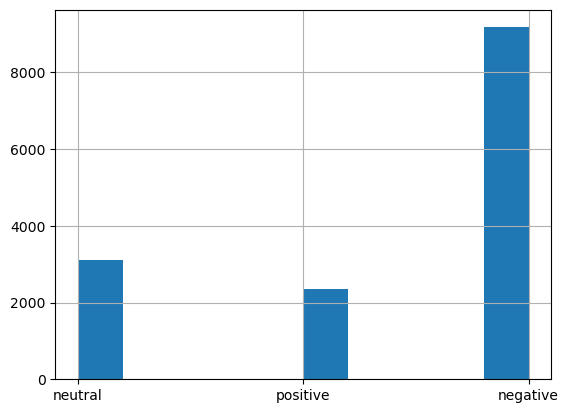

In [9]:
df['airline_sentiment'].hist()

In [10]:
target_map = {'positive': 1, 'negative': 0, 'neutral': 2}
df['target'] = df['airline_sentiment'].map(target_map)

In [12]:
df.head()

,airline_sentiment,text,target
0,neutral,@VirginAmerica What @dhepburn said.,2
1,positive,@VirginAmerica plus you've added commercials t...,1
2,neutral,@VirginAmerica I didn't today... Must mean I n...,2
3,negative,@VirginAmerica it's really aggressive to blast...,0
4,negative,@VirginAmerica and it's a really big bad thing...,0


In [13]:
df_train, df_test = train_test_split(df)

In [14]:
df_train.head()

,airline_sentiment,text,target
1041,negative,@united Change made in just over 3 hours. For ...,0
1989,negative,@united The engineer that designed the 787 doo...,0
14309,negative,"@AmericanAir 11 out of 11 delayed flights, you...",0
1711,negative,@united ouch not fair,0
11542,negative,@USAirways stuck in cae need reFlight Booking ...,0


In [15]:
vectorizer = TfidfVectorizer(max_features=2000)

In [17]:
X_train = vectorizer.fit_transform(df_train['text'])

In [18]:
X_train

<10980x2000 sparse matrix of type '<class 'numpy.float64'>'
	with 157852 stored elements in Compressed Sparse Row format>

In [19]:
X_test = vectorizer.transform(df_test['text'])

In [20]:
Y_train = df_train['target']
Y_test = df_test['target']

In [21]:
model = LogisticRegression(max_iter=500)
model.fit(X_train, Y_train)
print("Train acc:", model.score(X_train, Y_train))
print("Test acc:", model.score(X_test, Y_test))

Train acc: 0.8548269581056467
Test acc: 0.7991803278688525


In [22]:
Pr_train = model.predict_proba(X_train)
Pr_test = model.predict_proba(X_test)

In [24]:
print("Train AUC:", roc_auc_score(Y_train, Pr_train, multi_class='ovo'))
print("Test AUC:", roc_auc_score(Y_test, Pr_test, multi_class='ovo'))

Train AUC: 0.9430936043368199
Test AUC: 0.895399880695282


In [25]:
P_train = model.predict(X_train)

In [26]:
P_test = model.predict(X_test)

In [27]:
cm = confusion_matrix(Y_train, P_train, normalize='true')
cm

array([[0.96486133, 0.00813126, 0.02700741],
       [0.19966063, 0.69966063, 0.10067873],
       [0.30150538, 0.0516129 , 0.64688172]])

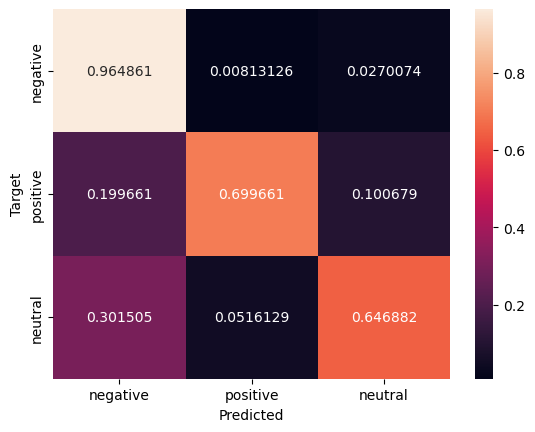

In [29]:
def plot_cm(cm):
    classes = ['negative', 'positive', 'neutral']
    df_cm = pd.DataFrame(cm, index=classes, columns=classes)
    ax = sn.heatmap(df_cm, annot=True, fmt='g')
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Target")
    
plot_cm(cm)

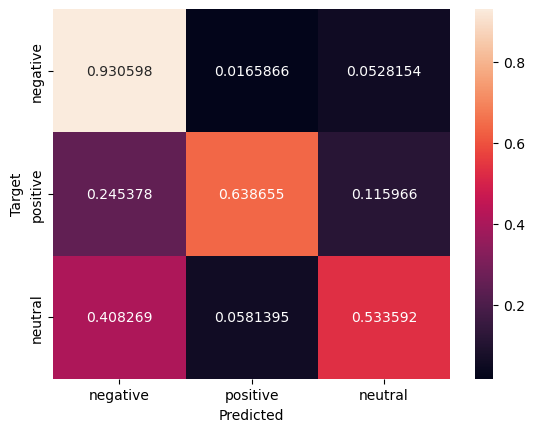

In [30]:
cm_test = confusion_matrix(Y_test, P_test, normalize='true')
plot_cm(cm_test)

In [42]:
binary_target_list = [target_map['positive'], target_map['negative']]
df_b_train = df_train[df_train['target'].isin(binary_target_list)]
df_b_test = df_test[df_test['target'].isin(binary_target_list)]

In [38]:
df_b_train.head()

,airline_sentiment,text,target
1041,negative,@united Change made in just over 3 hours. For ...,0
1989,negative,@united The engineer that designed the 787 doo...,0
14309,negative,"@AmericanAir 11 out of 11 delayed flights, you...",0
1711,negative,@united ouch not fair,0
11542,negative,@USAirways stuck in cae need reFlight Booking ...,0


In [43]:
X_train = vectorizer.fit_transform(df_b_train['text'])
X_test = vectorizer.transform(df_b_test['text'])

In [44]:
Y_train = df_b_train['target']
Y_test = df_b_test['target']

In [45]:
model = LogisticRegression(max_iter=500)
model.fit(X_train, Y_train)
print("Train acc:", model.score(X_train, Y_train))
print("Test acc:", model.score(X_test, Y_test))

Train acc: 0.9300982091276718
Test acc: 0.9147609147609148


In [46]:
Pr_train = model.predict_proba(X_train)[:, 1]
Pr_test = model.predict_proba(X_test)[:, 1]
print("Train AUC:", roc_auc_score(Y_train, Pr_train))
print("Test AUC:", roc_auc_score(Y_test, Pr_test))

Train AUC: 0.9790315809115082
Test AUC: 0.9533010061292087


In [47]:
model.coef_

array([[-0.25739278, -0.13377981, -0.34118084, ...,  0.49951607,
         0.00725632, -0.61652739]])

(array([  2.,   0.,   2.,   3.,   2.,  12.,  25.,  60., 183., 776., 550.,
        227.,  86.,  44.,  11.,   2.,   2.,   4.,   2.,   1.,   3.,   0.,
          1.,   0.,   0.,   0.,   0.,   0.,   0.,   2.]),
 array([-4.23787117, -3.82467728, -3.41148339, -2.9982895 , -2.58509561,
        -2.17190172, -1.75870783, -1.34551394, -0.93232006, -0.51912617,
        -0.10593228,  0.30726161,  0.7204555 ,  1.13364939,  1.54684328,
         1.96003717,  2.37323105,  2.78642494,  3.19961883,  3.61281272,
         4.02600661,  4.4392005 ,  4.85239439,  5.26558827,  5.67878216,
         6.09197605,  6.50516994,  6.91836383,  7.33155772,  7.74475161,
         8.1579455 ]),
 <BarContainer object of 30 artists>)

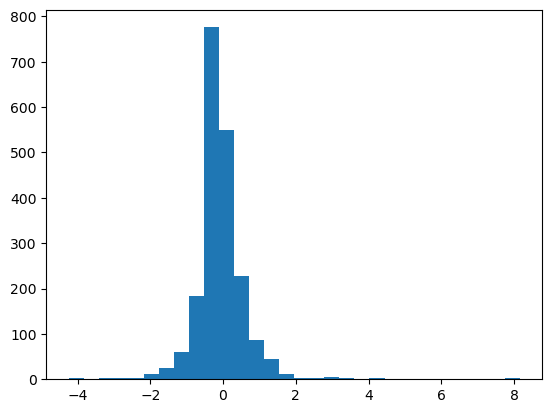

In [48]:
plt.hist(model.coef_[0], bins=30)

In [49]:
word_index_map = vectorizer.vocabulary_

In [50]:
threshold = 2
print("Most positive words")
for word, index in word_index_map.items():
    weight = model.coef_[0][index]
    if weight > threshold:
        print(word, weight)

Most positive words
southwestair 2.8600756651216237
thank 8.07050397819593
great 5.208733897153419
best 3.6368642825058703
virginamerica 3.2284047966793508
thx 2.8083250880133663
jetblue 3.0216163022833964
good 3.261536914347196
thanks 8.157945495708972
love 4.405152711208947
appreciate 2.9299264512008047
awesome 4.054714104295385
cool 2.0881519343105364
kudos 2.614183631684579
amazing 4.194647955663331
worries 2.711651303927691
wonderful 2.1204124375858777


In [51]:
threshold = 2
print("Most positive words")
for word, index in word_index_map.items():
    weight = model.coef_[0][index]
    if weight < -threshold:
        print(word, weight)

Most positive words
hours -3.1801201728627495
not -4.237871165084692
delayed -2.704527096041782
hour -2.0696846300514675
but -2.221048457976932
cancelled -2.6770621928074227
nothing -2.0768244800908717
what -2.014376186178049
no -3.970836170556357
worst -3.190035509706513
hold -2.7902315406842475
why -2.2269879894390896
luggage -2.162544497798022
